In [5]:
library(glmnet)

Warning message in install.packages("readr", repos = "http://cran.us.r-project.org", :
“installation of package ‘readr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
# Read in the X-values
wdata = as.matrix(t(read.csv('gene_data.txt', header = FALSE)))
wdata = data.matrix(wdata)

In [18]:
# Read in the Y-values
y <- scan("/Users/Salil/Desktop/applied_machine_learning/hw5/tissue_labels.html", what = "numeric") 
y = as.numeric(x)

# Binarize the columns.
y <- ifelse(y>0, 1, 0)

[1] 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1

[1] 0.1370355

[1] 0.302181213 0.288446611 0.275336267 0.262821809 0.250876152 0.239473444
 [7] 0.228589006 0.218199283 0.208281789 0.198815060 0.189778609 0.181152878
[13] 0.172919200 0.165059756 0.157557535 0.150396302 0.143560558 0.137035509
[19] 0.130807033 0.124861652 0.119186497 0.113769287 0.108598297 0.103662337
[25] 0.098950724 0.094453261 0.090160214 0.086062293 0.082150629 0.078416756
[31] 0.074852594 0.071450428 0.068202896 0.065102969 0.062143938 0.059319400
[37] 0.056623242 0.054049628 0.051592989 0.049248008 0.047009610 0.044872951
[43] 0.042833406 0.040886562 0.039028204 0.037254312 0.035561046 0.033944742
[49] 0.032401901 0.030929185 0.029523405 0.028181521 0.026900627 0.025677952
[55] 0.024510850 0.023396794 0.022333373 0.021318287 0.020349338 0.019424429
[61] 0.018541559 0.017698817 0.016894378 0.016126502 0.015393528 0.014693868
[67] 0.014026009 0.013388506 0.012779977 0.012199108 0.011644639 0.011115373
[73] 0.010610162 0.010127914 0.009667584 0.009228178 0.008808743 0.008408372
[79] 0.008026198 0.007661395 0.007313173 0.006980778 0.006663491 0.006360625
[85] 0.006071525 0.005795564 0.005532147 0.005280703 0.005040686 0.004811579
[91] 0.004592886 0.004384132 0.004184866 0.003994658 0.003813094 0.003639783
[97] 0.003474350 0.003316435

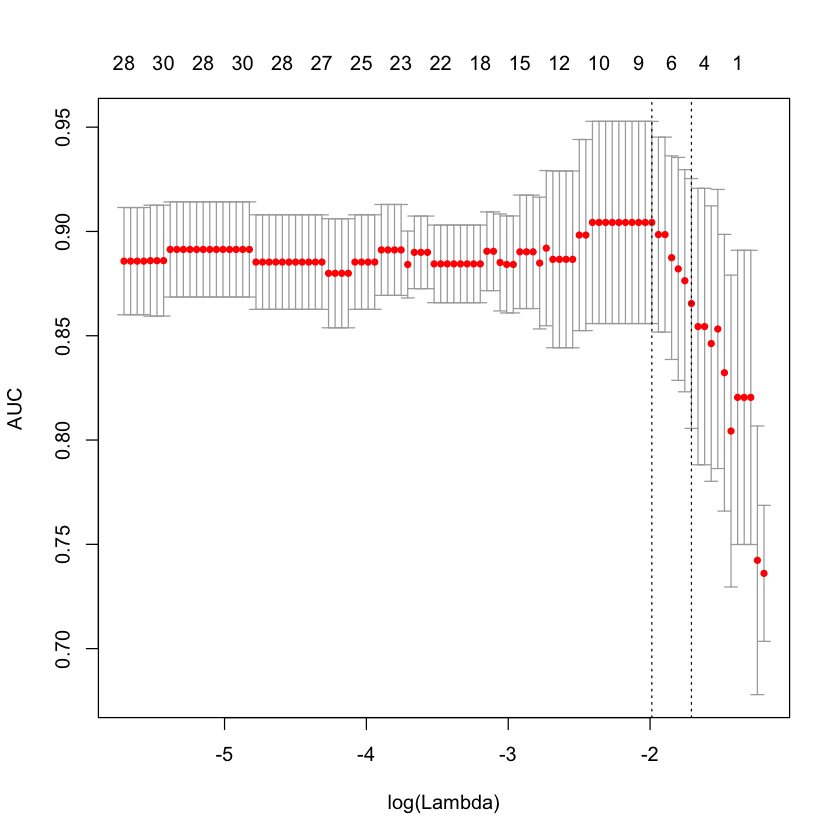

In [58]:
# Perform Binomial Logistic Regression looking at AUC using lasso regresssion.
model_AUC = cv.glmnet(wdata, y, family='binomial', type.measure="auc", nfolds=5, standardize=TRUE, alpha=1)
plot(model_AUC)

# Get a handle to the coefficents
model_AUC$lambda.min
model_AUC$lambda

           Length Class  Mode     
lambda     98     -none- numeric  
cvm        98     -none- numeric  
cvsd       98     -none- numeric  
cvup       98     -none- numeric  
cvlo       98     -none- numeric  
nzero      98     -none- numeric  
name        1     -none- character
glmnet.fit 13     lognet list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  

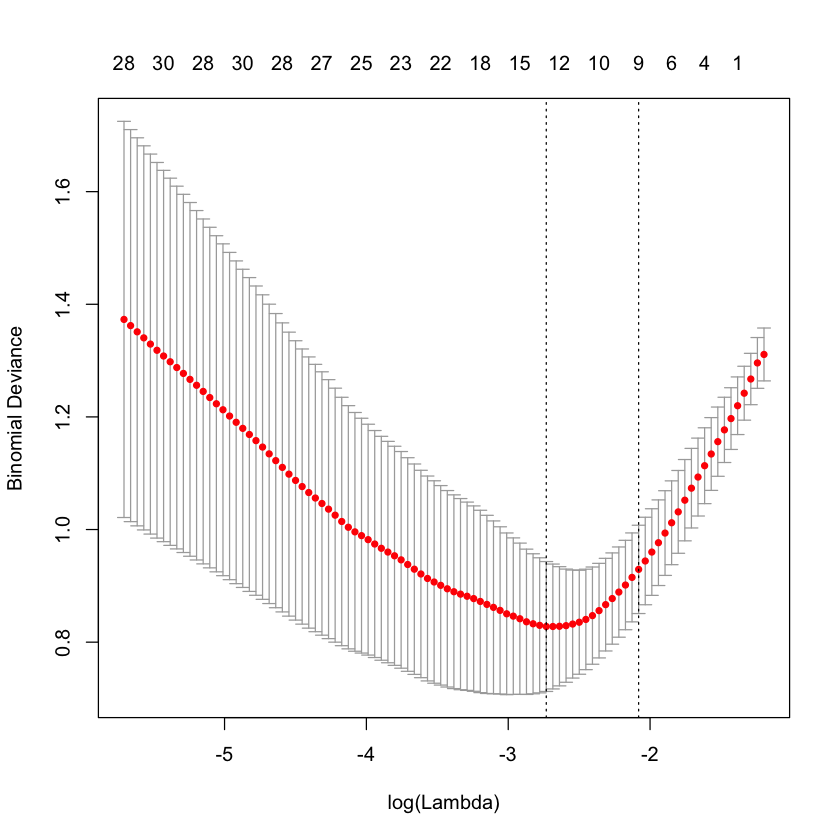

In [32]:
# Perform Binomial Logistic Regression looking at AUC using lasso regresssion.
model_Dev = cv.glmnet(wdata, y, family='binomial', type.measure="deviance", standardize=TRUE, alpha=1)
plot(model_Dev)
summary(model_Dev)

# Get a handle to the coefficents
(coef(model_Dev))

# Analysis